In [27]:
import sys 
import os
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dev'))

from mads_datasets import DatasetFactoryProvider, DatasetType
from mltrainer.preprocessors import BasePreprocessor
from mltrainer import Trainer, TrainerSettings, ReportTypes, metrics
from neural_network import NeuralNetwork
from neural_network import DeepNeuralNetwork

from helpers import get_last_accuracy_from_tensorboard

import torch.optim as optim
import torch

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [28]:
fashionfactory = DatasetFactoryProvider.create_factory(DatasetType.FASHION)
preprocessor = BasePreprocessor()

batchsize = 64

streamers = fashionfactory.create_datastreamer(batchsize=batchsize, preprocessor=preprocessor)
train = streamers["train"]
valid = streamers["valid"]

trainstreamer = train.stream()
validstreamer = valid.stream()

accuracy = metrics.Accuracy()
loss_func = torch.nn.CrossEntropyLoss()

2025-05-03 07:37:21.027 | INFO     | mads_datasets.base:download_data:121 - Folder already exists at /home/azureuser/.cache/mads_datasets/fashionmnist
2025-05-03 07:37:21.029 | INFO     | mads_datasets.base:download_data:124 - File already exists at /home/azureuser/.cache/mads_datasets/fashionmnist/fashionmnist.pt


In [34]:
units = [2048, 1024, 512, 256, 128, 64, 32, 16]

epochs = 5
accuracies5 = []
dir = "modellogs/UNITS/EPOCH5/"

for units1 in units:
    row = []
    for units2 in units:
        logdir = f"{dir}u{units1}_u{units2}_e{epochs}"

        settings = TrainerSettings(
            epochs=epochs,
            metrics=[accuracy],
            logdir="modellogs",
            train_steps=100,
            valid_steps=100,
            reporttypes=[ReportTypes.TENSORBOARD, ReportTypes.TOML]
        )

        model = NeuralNetwork(num_classes=10, units1=units1, units2=units2)
        settings.logdir = f"{dir}u{units1}_u{units2}_e{epochs}"

        trainer = Trainer(
            model=model,
            settings=settings,
            loss_fn=loss_func,
            optimizer=optim.Adam,
            traindataloader=trainstreamer,
            validdataloader=validstreamer,
            scheduler=optim.lr_scheduler.ReduceLROnPlateau
        )

        trainer.loop()
        
        tb_subdirs = [os.path.join(logdir, d) for d in os.listdir(logdir) if os.path.isdir(os.path.join(logdir, d))]

        # Zoek eerste subdir met tensorboard events
        tb_dir = next((d for d in tb_subdirs if any("events.out.tfevents" in f for f in os.listdir(d))), None)

        if tb_dir:
            last_acc = get_last_accuracy_from_tensorboard(tb_dir)
        else:
            last_acc = np.nan
        
        row.append(last_acc)
    accuracies5.append(row)

2025-05-03 08:02:21.041 | INFO     | mltrainer.trainer:dir_add_timestamp:24 - Logging to modellogs/UNITS/EPOCH5/u2048_u2048_e5/20250503-080221
2025-05-03 08:02:21.042 | INFO     | mltrainer.trainer:__init__:68 - Found earlystop_kwargs in settings.Set to None if you dont want earlystopping.
100%|██████████| 100/100 [00:04<00:00, 20.42it/s]
2025-05-03 08:02:26.862 | INFO     | mltrainer.trainer:report:205 - Epoch 0 train 0.7735 test 0.5793 metric ['0.7934']
100%|██████████| 100/100 [00:04<00:00, 20.46it/s]
2025-05-03 08:02:32.631 | INFO     | mltrainer.trainer:report:205 - Epoch 2 train 0.5028 test 0.4964 metric ['0.8203']
100%|██████████| 100/100 [00:04<00:00, 20.61it/s]
2025-05-03 08:02:38.363 | INFO     | mltrainer.trainer:report:205 - Epoch 4 train 0.4803 test 0.5105 metric ['0.8172']
2025-05-03 08:02:38.364 | INFO     | mltrainer.trainer:__call__:248 - best loss: 0.4964, current loss 0.5105.Counter 1/10.
100%|██████████| 100/100 [00:04<00:00, 20.62it/s]
2025-05-03 08:02:44.086 | INF

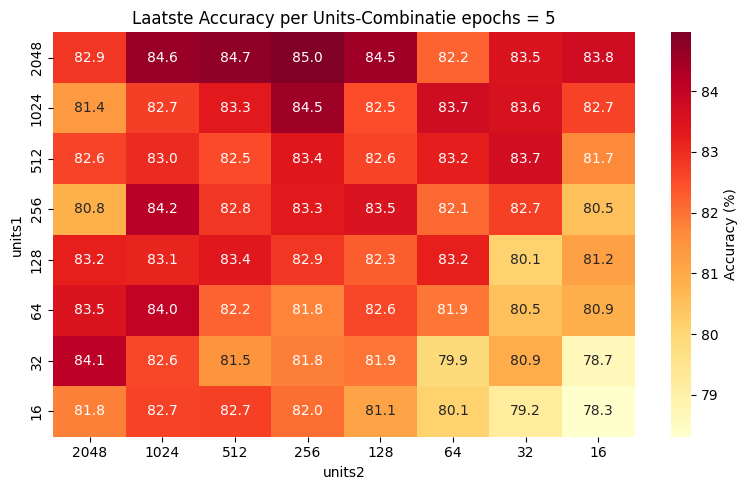

In [37]:
# Plot de heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(
    accuracies5,
    annot=True,
    fmt=".1f",
    xticklabels=units,
    yticklabels=units,
    cmap="YlOrRd",
    cbar_kws={'label': 'Accuracy (%)'}
)
ax.set_xlabel("units2")
ax.set_ylabel("units1")
ax.set_title("Laatste Accuracy per Units-Combinatie epochs = 5")
plt.tight_layout()
plt.savefig("heatmap_epochs5")
plt.show()

In [32]:
units = [2048, 1024, 512, 256, 128, 64, 32, 16]

epochs = 10
accuracies = []
dir = "modellogs/UNITS/EPOCH10/"

for units1 in units:
    row = []
    for units2 in units:
        logdir = f"{dir}u{units1}_u{units2}_e{epochs}"

        settings = TrainerSettings(
            epochs=epochs,
            metrics=[accuracy],
            logdir="modellogs",
            train_steps=100,
            valid_steps=100,
            reporttypes=[ReportTypes.TENSORBOARD, ReportTypes.TOML]
        )

        model = NeuralNetwork(num_classes=10, units1=units1, units2=units2)
        settings.logdir = f"{dir}u{units1}_u{units2}_e{epochs}"

        trainer = Trainer(
            model=model,
            settings=settings,
            loss_fn=loss_func,
            optimizer=optim.Adam,
            traindataloader=trainstreamer,
            validdataloader=validstreamer,
            scheduler=optim.lr_scheduler.ReduceLROnPlateau
        )

        trainer.loop()
        
        tb_subdirs = [os.path.join(logdir, d) for d in os.listdir(logdir) if os.path.isdir(os.path.join(logdir, d))]

        # Zoek eerste subdir met tensorboard events
        tb_dir = next((d for d in tb_subdirs if any("events.out.tfevents" in f for f in os.listdir(d))), None)

        if tb_dir:
            last_acc = get_last_accuracy_from_tensorboard(tb_dir)
        else:
            last_acc = np.nan
        
        row.append(last_acc)
    accuracies.append(row)

2025-05-03 07:48:01.924 | INFO     | mltrainer.trainer:dir_add_timestamp:24 - Logging to modellogs/UNITS/EPOCH10/u2048_u2048_e10/20250503-074801
2025-05-03 07:48:01.926 | INFO     | mltrainer.trainer:__init__:68 - Found earlystop_kwargs in settings.Set to None if you dont want earlystopping.
100%|██████████| 100/100 [00:05<00:00, 19.26it/s]
2025-05-03 07:48:08.028 | INFO     | mltrainer.trainer:report:205 - Epoch 0 train 0.7508 test 0.5683 metric ['0.7878']
100%|██████████| 100/100 [00:05<00:00, 19.41it/s]
2025-05-03 07:48:14.107 | INFO     | mltrainer.trainer:report:205 - Epoch 2 train 0.5480 test 0.5513 metric ['0.7928']
100%|██████████| 100/100 [00:04<00:00, 20.37it/s]
2025-05-03 07:48:19.940 | INFO     | mltrainer.trainer:report:205 - Epoch 4 train 0.4581 test 0.4778 metric ['0.8284']
100%|██████████| 100/100 [00:04<00:00, 20.10it/s]
2025-05-03 07:48:25.833 | INFO     | mltrainer.trainer:report:205 - Epoch 6 train 0.4474 test 0.5061 metric ['0.8148']
2025-05-03 07:48:25.834 | INFO 

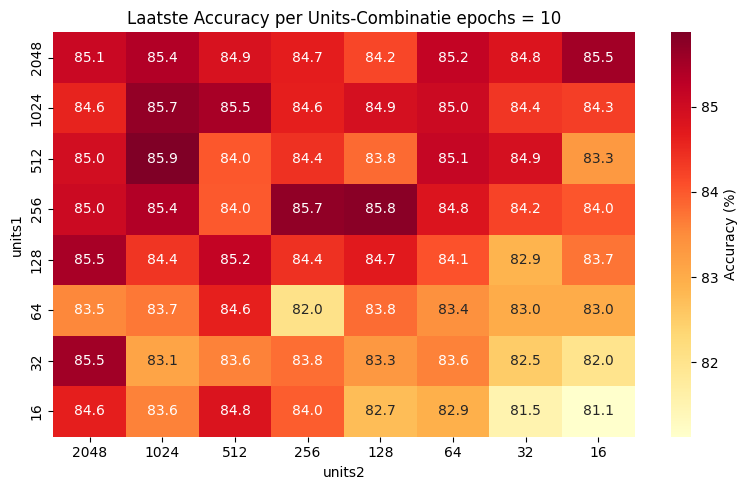

In [38]:
# Plot de heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(
    accuracies,
    annot=True,
    fmt=".1f",
    xticklabels=units,
    yticklabels=units,
    cmap="YlOrRd",
    cbar_kws={'label': 'Accuracy (%)'}
)
ax.set_xlabel("units2")
ax.set_ylabel("units1")
ax.set_title("Laatste Accuracy per Units-Combinatie epochs = 10")
plt.tight_layout()
plt.savefig("heatmap_epochs10")
plt.show()

In [18]:
units = [512, 256, 128]
epochs = 10
results = []

for units1 in units:
    for units2 in units:

        settings = TrainerSettings(
            epochs=epochs,
            metrics=[accuracy],
            logdir="modellogs",
            train_steps=100,
            valid_steps=100,
            reporttypes=[ReportTypes.TENSORBOARD, ReportTypes.TOML]
        )

        model = NeuralNetwork (num_classes=10, units1=units1, units2=units2)
        settings.logdir = f"modellogs/SGD/u{units1}_u{units2}_e{epochs}"
        
        trainer = Trainer(
            model=model,
            settings=settings,
            loss_fn=loss_func,
            optimizer=optim.SGD,
            traindataloader=trainstreamer,
            validdataloader=validstreamer,
            scheduler=optim.lr_scheduler.ReduceLROnPlateau
        )

        trainer.loop()

        results.append({
            "units1": units1,
            "units2": units2,
            "run_dir": settings.logdir,
            "epoch": epochs,
        })

2025-05-02 10:46:33.907 | INFO     | mltrainer.trainer:dir_add_timestamp:24 - Logging to modellogs/SGD/u512_u512_e10/20250502-104633
2025-05-02 10:46:33.908 | INFO     | mltrainer.trainer:__init__:68 - Found earlystop_kwargs in settings.Set to None if you dont want earlystopping.
100%|██████████| 100/100 [00:00<00:00, 231.57it/s]
2025-05-02 10:46:34.613 | INFO     | mltrainer.trainer:report:205 - Epoch 0 train 2.2966 test 2.2905 metric ['0.1630']
100%|██████████| 100/100 [00:00<00:00, 230.44it/s]
2025-05-02 10:46:35.396 | INFO     | mltrainer.trainer:report:205 - Epoch 2 train 2.2832 test 2.2775 metric ['0.1956']
100%|██████████| 100/100 [00:00<00:00, 202.42it/s]
2025-05-02 10:46:36.153 | INFO     | mltrainer.trainer:report:205 - Epoch 4 train 2.2716 test 2.2633 metric ['0.2052']
100%|██████████| 100/100 [00:00<00:00, 245.50it/s]
2025-05-02 10:46:36.824 | INFO     | mltrainer.trainer:report:205 - Epoch 6 train 2.2561 test 2.2502 metric ['0.2159']
100%|██████████| 100/100 [00:00<00:00, 

In [ ]:
units1 = 512
units2 = 256
units3 = 128
epochs = 20

settings = TrainerSettings(
            epochs=epochs,
            metrics=[accuracy],
            logdir="modellogs",
            train_steps=100,
            valid_steps=100,
            reporttypes=[ReportTypes.TENSORBOARD, ReportTypes.TOML]
        )

model = DeepNeuralNetwork (num_classes=10, units1=units1, units2=units2, units3 = units3)
settings.logdir = f"modellogs/DEEP/u{units1}_u{units2}_u{units3}_e{epochs}"
        
trainer = Trainer(
    model=model,
    settings=settings,
    loss_fn=loss_func,
    optimizer=optim.Adam,
    traindataloader=trainstreamer,
    validdataloader=validstreamer,
    scheduler=optim.lr_scheduler.ReduceLROnPlateau
)

trainer.loop()

resultsdeep = []

resultsdeep.append({
    "units1": units1,
    "units2": units2,
    "run_dir": settings.logdir,
    "epoch": epochs,
})

2025-05-02 11:37:34.651 | INFO     | mltrainer.trainer:dir_add_timestamp:24 - Logging to modellogs/DEEP/u512_u256_u128_e20/20250502-113734
2025-05-02 11:37:34.653 | INFO     | mltrainer.trainer:__init__:68 - Found earlystop_kwargs in settings.Set to None if you dont want earlystopping.
100%|██████████| 100/100 [00:00<00:00, 175.84it/s]
2025-05-02 11:37:35.505 | INFO     | mltrainer.trainer:report:205 - Epoch 0 train 0.9566 test 0.6424 metric ['0.7641']
100%|██████████| 100/100 [00:00<00:00, 186.47it/s]
2025-05-02 11:37:36.309 | INFO     | mltrainer.trainer:report:205 - Epoch 2 train 0.5678 test 0.5520 metric ['0.8002']
100%|██████████| 100/100 [00:00<00:00, 181.61it/s]
2025-05-02 11:37:37.135 | INFO     | mltrainer.trainer:report:205 - Epoch 4 train 0.5071 test 0.5045 metric ['0.8145']
100%|██████████| 100/100 [00:00<00:00, 188.86it/s]
2025-05-02 11:37:37.933 | INFO     | mltrainer.trainer:report:205 - Epoch 6 train 0.5061 test 0.5440 metric ['0.8063']
2025-05-02 11:37:37.934 | INFO   